## Regression

In [1]:
from robingrad import Tensor, draw_dot
import robingrad.nn as nn
from sklearn.datasets import make_regression
import numpy as np
import time
from sklearn.metrics import r2_score

### Dataset

In [2]:
X, y = make_regression(n_samples=200, n_features=5, n_targets=1, random_state=42)
print(X.shape)
print(y.shape)
print(X[0])
print(y[0:5])

(200, 5)
(200,)
[0.95927083 0.02451017 0.49799829 1.45114361 2.15318246]
[172.54436082 -52.9529574   -4.14935233 193.99958991 -66.96262773]


In [3]:
X_train = Tensor(X, requires_grad=True)
print(type(X_train), X_train.shape)
y_train = Tensor(y, requires_grad=True)
print(type(y_train), y_train.shape)

<class 'robingrad.tensor.Tensor'> (200, 5)
<class 'robingrad.tensor.Tensor'> (200,)


### Model

In [4]:
class RobinNet:
    def __init__(self):
        self.l1 = nn.Linear(5,16)
        self.l2 = nn.Linear(16,1)
    def __call__(self, x):
        x = self.l1(x)
        x = x.relu()
        x = self.l2(x)
        return x
        
model = RobinNet()

In [5]:
res = model(X_train[0].reshape((1,5)))
res

Tensor: __add__
data: 
[[-4.215913]]
grad: 
[[0.]]
dtype: float32

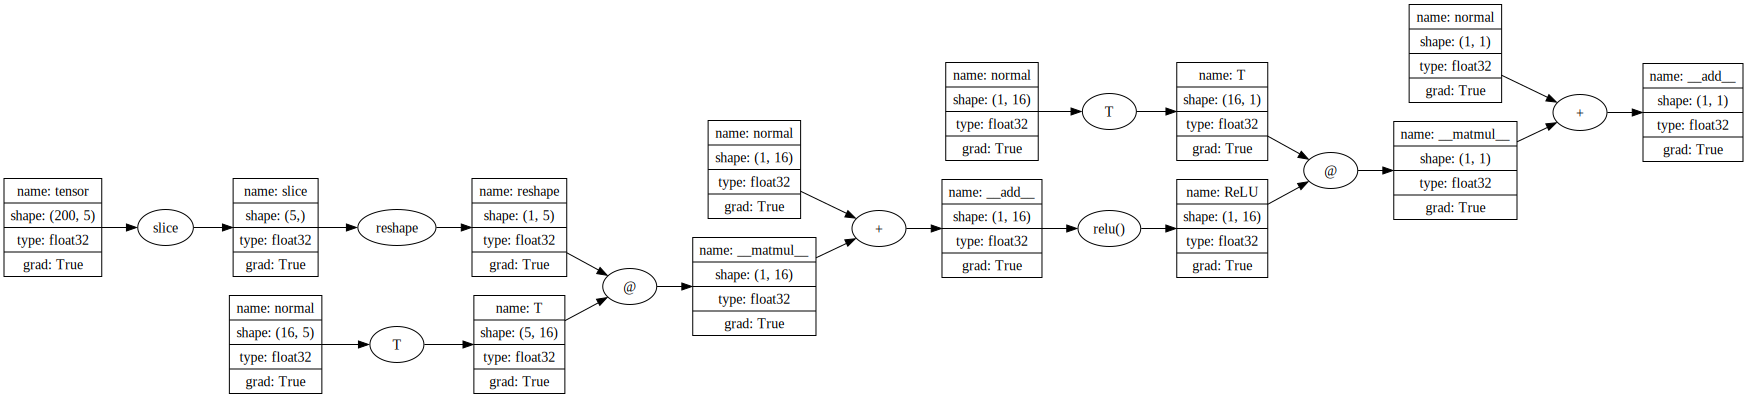

In [6]:
draw_dot(res)

In [7]:
epochs = 100
for epoch in range(epochs):
    y_pred = []
    losses = []
    s = time.monotonic()
    for i in range(X_train.shape[0]):
        output = model(X_train[i].reshape((1,5)))
        y_pred.append(float(output.data[0]))
        target = y_train[i].reshape((1,1))
        loss = (output-target)**2
        losses.append(float(loss.data[0]))
        loss.backward()
        for p in [model.l1.weight, model.l1.bias, model.l2.weight, model.l2.bias]:
            p.data += -3e-4*p.grad
        for p in [model.l1.weight, model.l1.bias, model.l2.weight, model.l2.bias]:
            p.grad = np.zeros_like(p.grad)
    e = time.monotonic()
    t = e - s
    loss_epoch = sum(losses)/ len(losses)
    r2 = r2_score(y, y_pred)
    if epoch % 10 == 0 or epoch == epochs-1:
        print(f"epoch: {epoch} | loss: {loss_epoch:.2f} | R2: {r2:.2f} | time: {t:.2f} sec.")
        

epoch: 0 | loss: 2147.65 | R2: 0.76 | time: 0.12 sec.
epoch: 10 | loss: 4.32 | R2: 1.00 | time: 0.05 sec.
epoch: 20 | loss: 1.94 | R2: 1.00 | time: 0.05 sec.
epoch: 30 | loss: 1.17 | R2: 1.00 | time: 0.05 sec.
epoch: 40 | loss: 0.83 | R2: 1.00 | time: 0.06 sec.
epoch: 50 | loss: 0.62 | R2: 1.00 | time: 0.06 sec.
epoch: 60 | loss: 0.48 | R2: 1.00 | time: 0.05 sec.
epoch: 70 | loss: 0.41 | R2: 1.00 | time: 0.10 sec.
epoch: 80 | loss: 0.35 | R2: 1.00 | time: 0.05 sec.
epoch: 90 | loss: 0.30 | R2: 1.00 | time: 0.05 sec.
epoch: 99 | loss: 0.27 | R2: 1.00 | time: 0.06 sec.


In [8]:
loss_epoch = sum(losses)/ len(losses)
loss_epoch

0.27100109969740516

In [9]:
import matplotlib.pyplot as plt

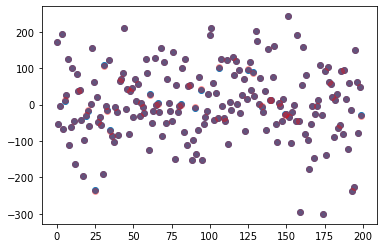

In [10]:
x = [i for i in range(len(X))]
plt.scatter(x, y)
plt.scatter(x, y_pred, color='red', alpha=0.3)
plt.show()